In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten,BatchNormalization , Dropout

In [2]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/archive/train',
    labels ='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/archive/test',
    labels ='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)



Found 10180 files belonging to 2 classes.
Found 2517 files belonging to 2 classes.


In [3]:
#normalize 
#images stored are in form of numpy array which has values rangingn from 0 to 255. Thus we have to mormalize it to make it from 0 to 1. i.e we have to normlaize it

def process(image,label):
    image= tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# CREATING OUR CNN MODEL

## IN OUR MODEL THERE WILL BE 3 LAYERS WITH NO OF FILTERS BEING 32, 64 AND 128 AND THE ACTIVATION FUNCTION WE WILL BE 
#USING WILL BE RELU
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [6]:
## COMPILING AND EXECUTING OUR MODEL
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])


In [7]:
model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
319/319 [==============================] - 888s 3s/step - loss: 0.5333 - accuracy: 0.9806 - val_loss: 0.7485 - val_accuracy: 0.9921
Epoch 2/10
319/319 [==============================] - 667s 2s/step - loss: 0.4134 - accuracy: 0.9836 - val_loss: 0.4482 - val_accuracy: 0.9631
Epoch 3/10
319/319 [==============================] - 942s 3s/step - loss: 0.1719 - accuracy: 0.9892 - val_loss: 0.0697 - val_accuracy: 0.9960
Epoch 4/10
319/319 [==============================] - 715s 2s/step - loss: 0.1492 - accuracy: 0.9917 - val_loss: 0.1277 - val_accuracy: 0.9893
Epoch 5/10
319/319 [==============================] - 666s 2s/step - loss: 0.0656 - accuracy: 0.9935 - val_loss: 0.0728 - val_accuracy: 0.9857
Epoch 6/10
319/319 [==============================] - 695s 2s/step - loss: 0.0630 - accuracy: 0.9943 - val_loss: 0.3240 - val_accuracy: 0.9754
Epoch 7/10
319/319 [==============================] - 652s 2s/step - loss: 0.0385 - accuracy: 0.9952 - val_loss: 0.1255 - val_accuracy: 0.9952

In [11]:
import cv2
import matplotlib.pyplot as plt

In [12]:
cat_img = cv2.imread("D:/cat.jpeg")


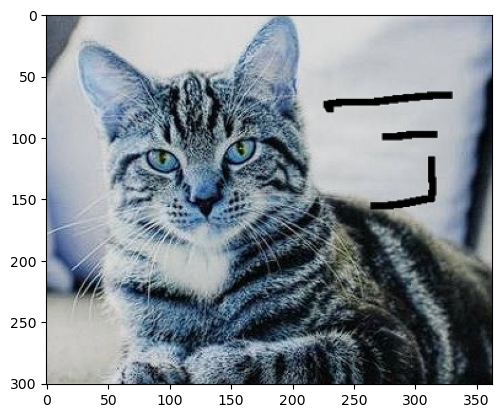

In [13]:
plt.imshow(cat_img)

In [14]:
cat_img.shape

(301, 363, 3)

In [15]:
cat_img = cv2.resize(cat_img, (256,256))

In [16]:
cat_img_input = cat_img.reshape((1,256,256,3))

In [17]:
model.predict(cat_img_input)

1/1 [==============================] - 0s 174ms/step


array([[1.]], dtype=float32)

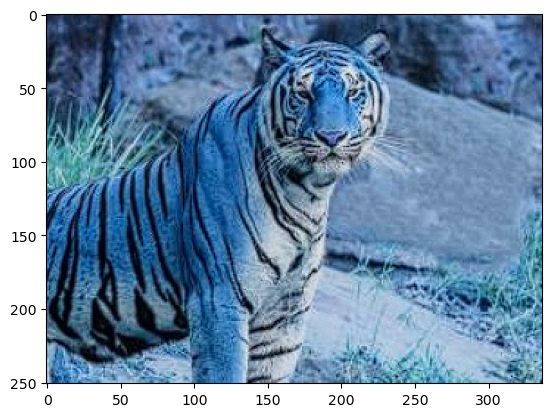

In [18]:
tiger_img = cv2.imread("D:/tiger.jpeg")
plt.imshow(tiger_img)


In [19]:
tiger_img.shape

(251, 337, 3)

In [20]:
tiger_img = cv2.resize(tiger_img, (256,256))
tiger_img_input = tiger_img.reshape((1,256,256,3))

In [21]:
model.predict(tiger_img_input)

1/1 [==============================] - 0s 40ms/step


array([[0.]], dtype=float32)

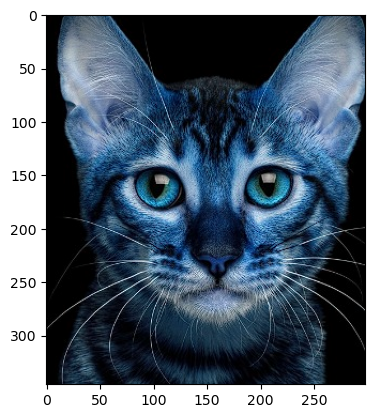

In [22]:
## Cat and tiger mix

mix_img = cv2.imread("D:/cat-tiger-mix.jpeg")
plt.imshow(mix_img)

In [23]:
tiger_img.shape


(256, 256, 3)

In [24]:
tiger_img = cv2.resize(tiger_img, (256,256))
tiger_img_input = tiger_img.reshape((1,256,256,3))

In [25]:
model.predict(tiger_img_input)

1/1 [==============================] - 0s 40ms/step


array([[0.]], dtype=float32)

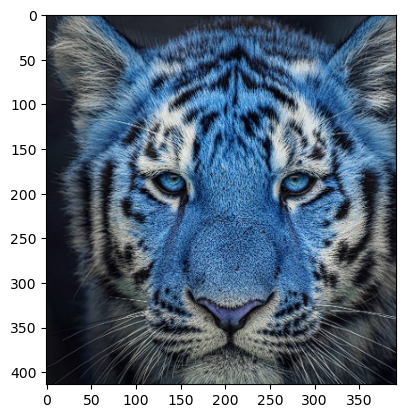

In [26]:

tig_img = cv2.imread("D:/tiger-2.jpeg")
plt.imshow(tig_img)

In [27]:
tiger_img.shape


(256, 256, 3)

In [28]:
tiger_img = cv2.resize(tiger_img, (256,256))
tiger_img_input = tiger_img.reshape((1,256,256,3))

In [29]:
model.predict(tiger_img_input)

1/1 [==============================] - 0s 38ms/step


array([[0.]], dtype=float32)

## Blending cat and tiger

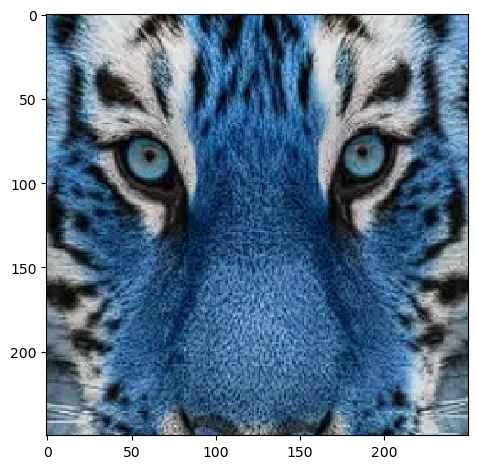

In [6]:
import cv2
from skimage import io
cat = cv2.imread("D:/c1.jpeg")
tiger = cv2.imread("D:/t1.jpeg")

resized_cat =  cv2.resize(cat,(250,250))
resized_tiger = cv2.resize(tiger,(250,250))

io.imshow(resized_cat)
io.imshow(resized_tiger)

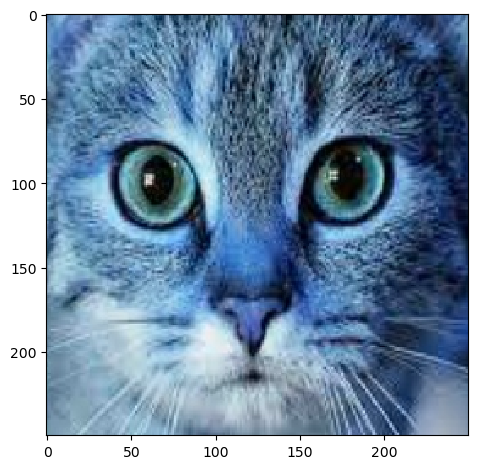

In [7]:
import cv2
from skimage import io
cat = cv2.imread("D:/c1.jpeg")
tiger = cv2.imread("D:/t1.jpeg")

resized_cat =  cv2.resize(cat,(250,250))
resized_tiger = cv2.resize(tiger,(250,250))

io.imshow(resized_cat)

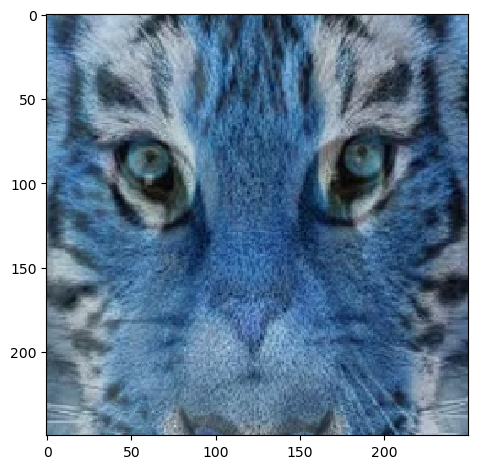

In [10]:
blended_image = cv2.addWeighted(resized_cat, 0.4, resized_tiger, 0.6, 0.1)
io.imshow(blended_image)